# Upper confidence bound

## Use Case: Multi-armed Bandit Problem.



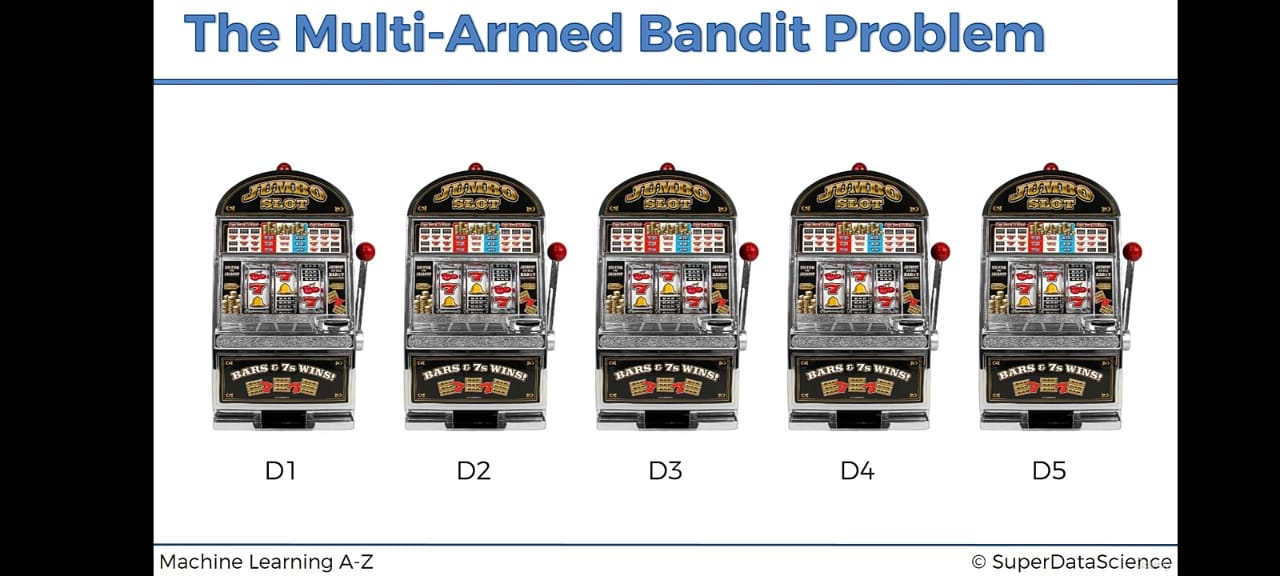

The problem we have to solve is `how to bet to maximize our return?`

Each machine has certain distribution. But since we don't know which machine has `optimal` distribution, we need to combine `exploration` of this machines with their `exploitation` in order to find out which of this machines are best.

The `modern` application of this problem is use in `advertisement`. For example, we have `500` ads and we have to find which `ad` is best one.

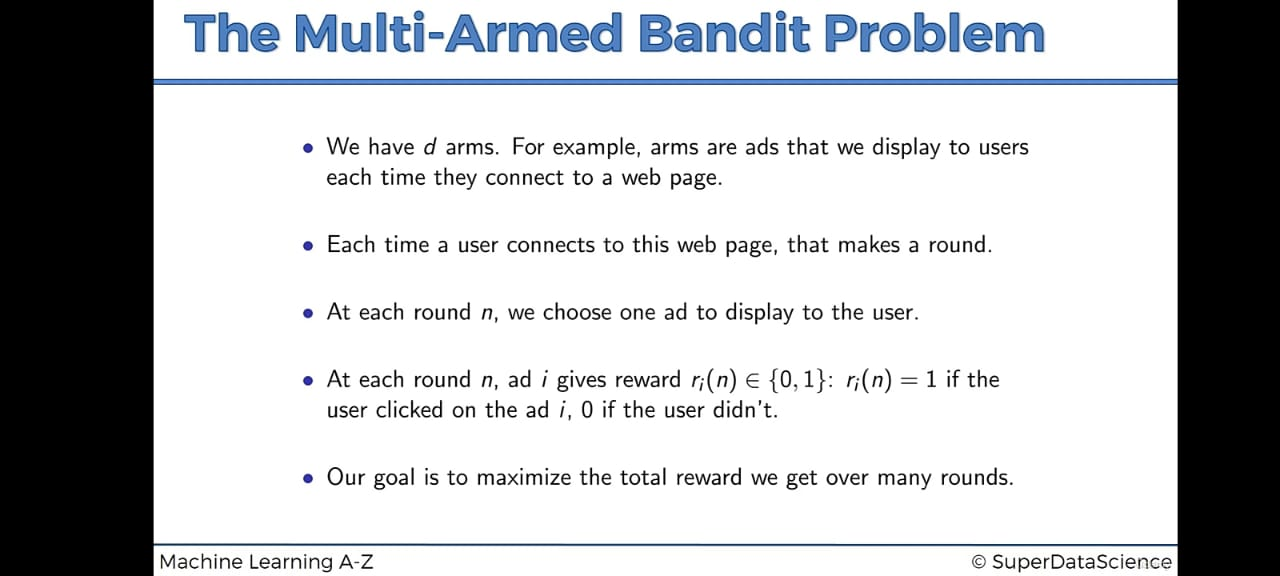

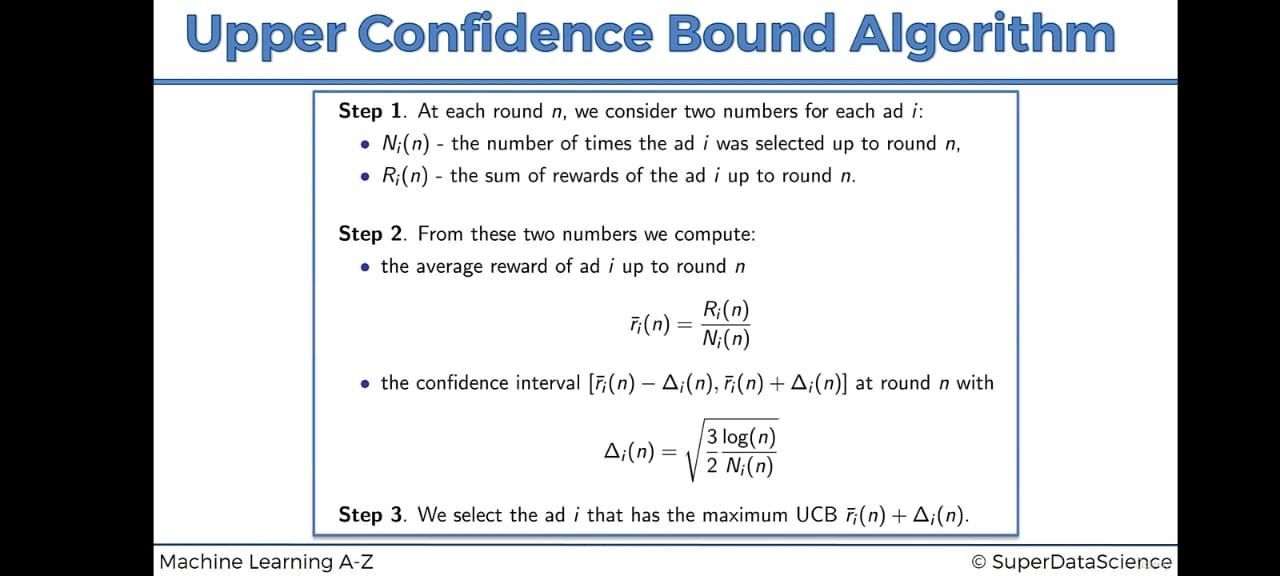

### Working of Upper confidence bound algorithm.

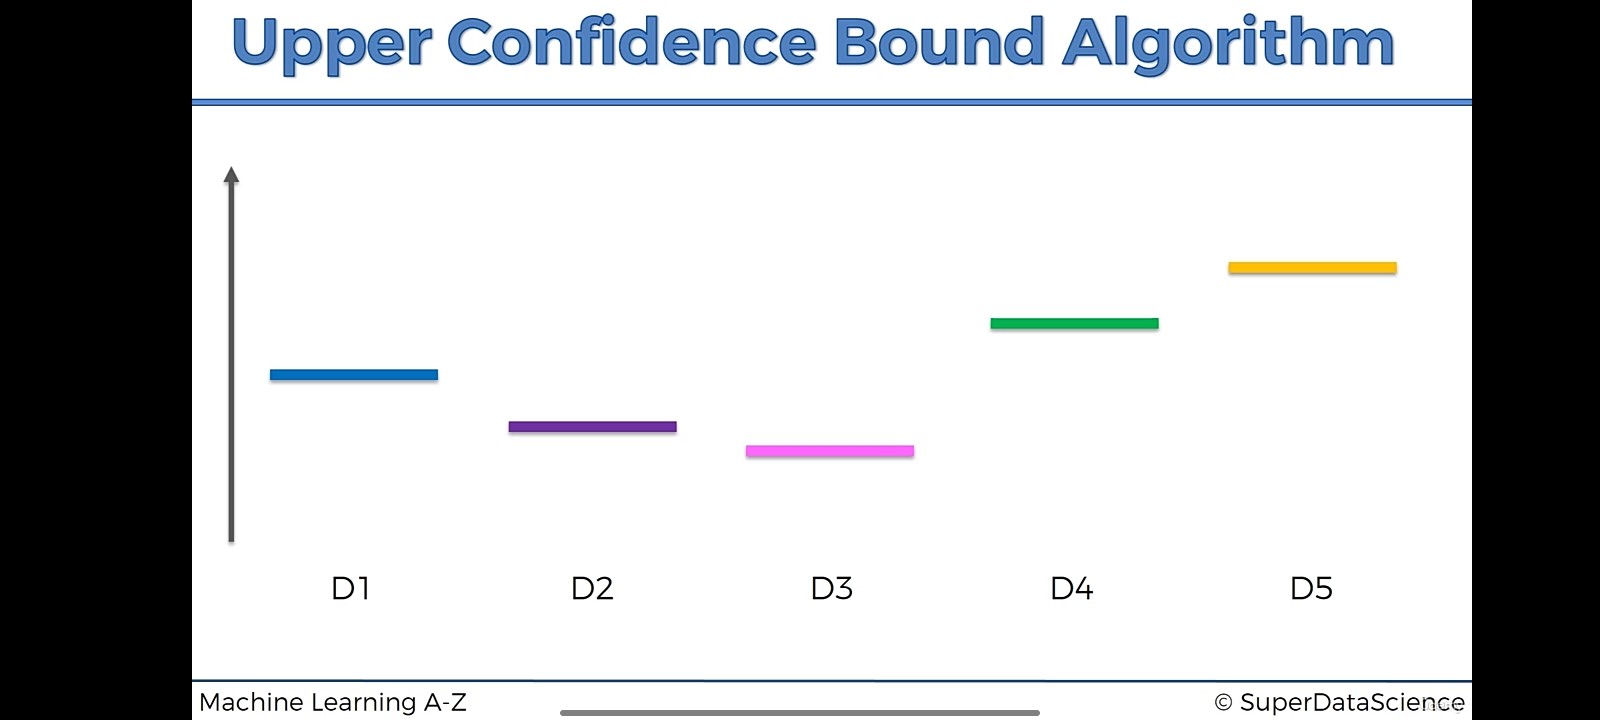

`Step-1:` For each Distribution, the algorithm assumes some starting point.

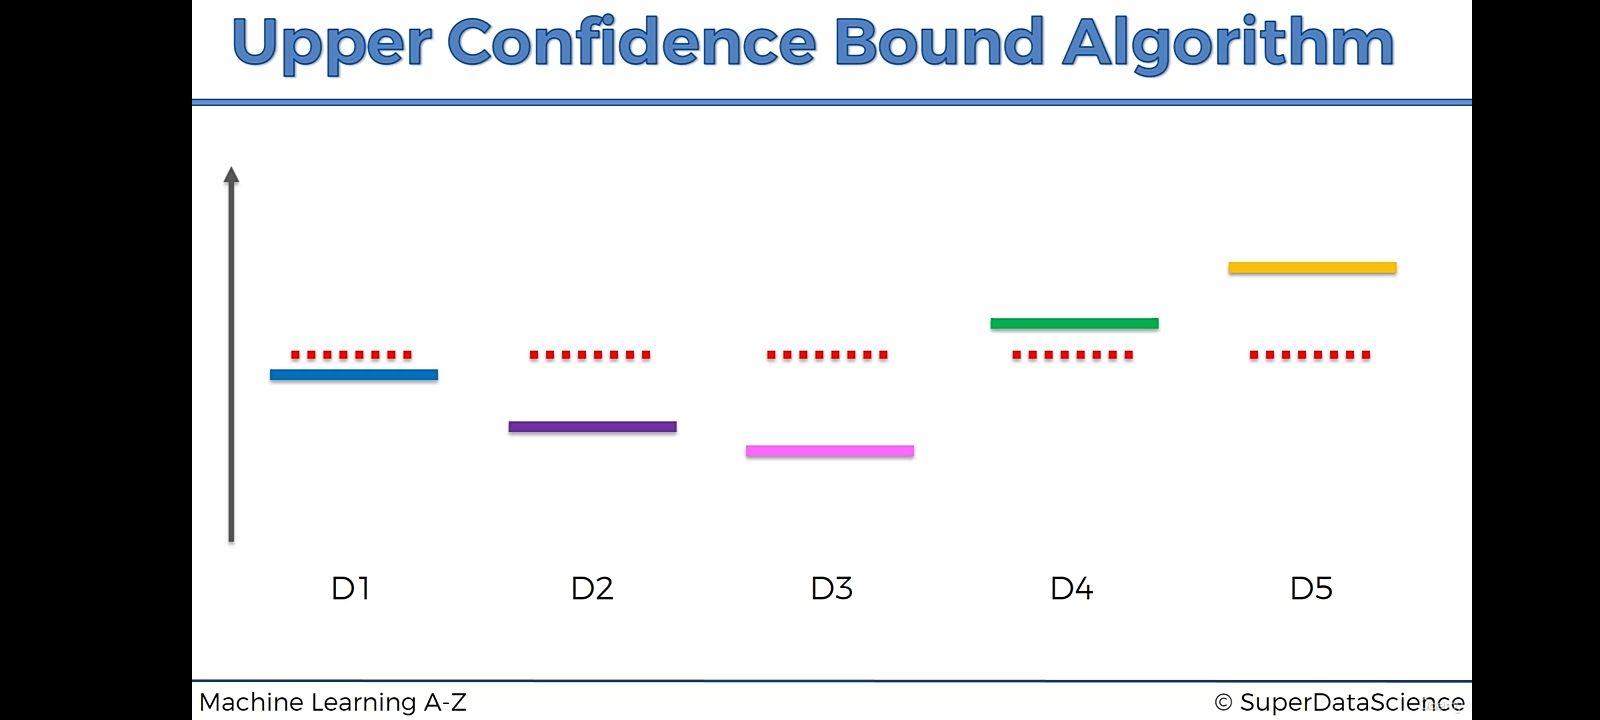

`Note:` We just have to consider the `red` lines.

`Step-2:` the  algorithm then creats `confidence band` and there is very chances that the actual distribution of each `ads` falls inside this band.

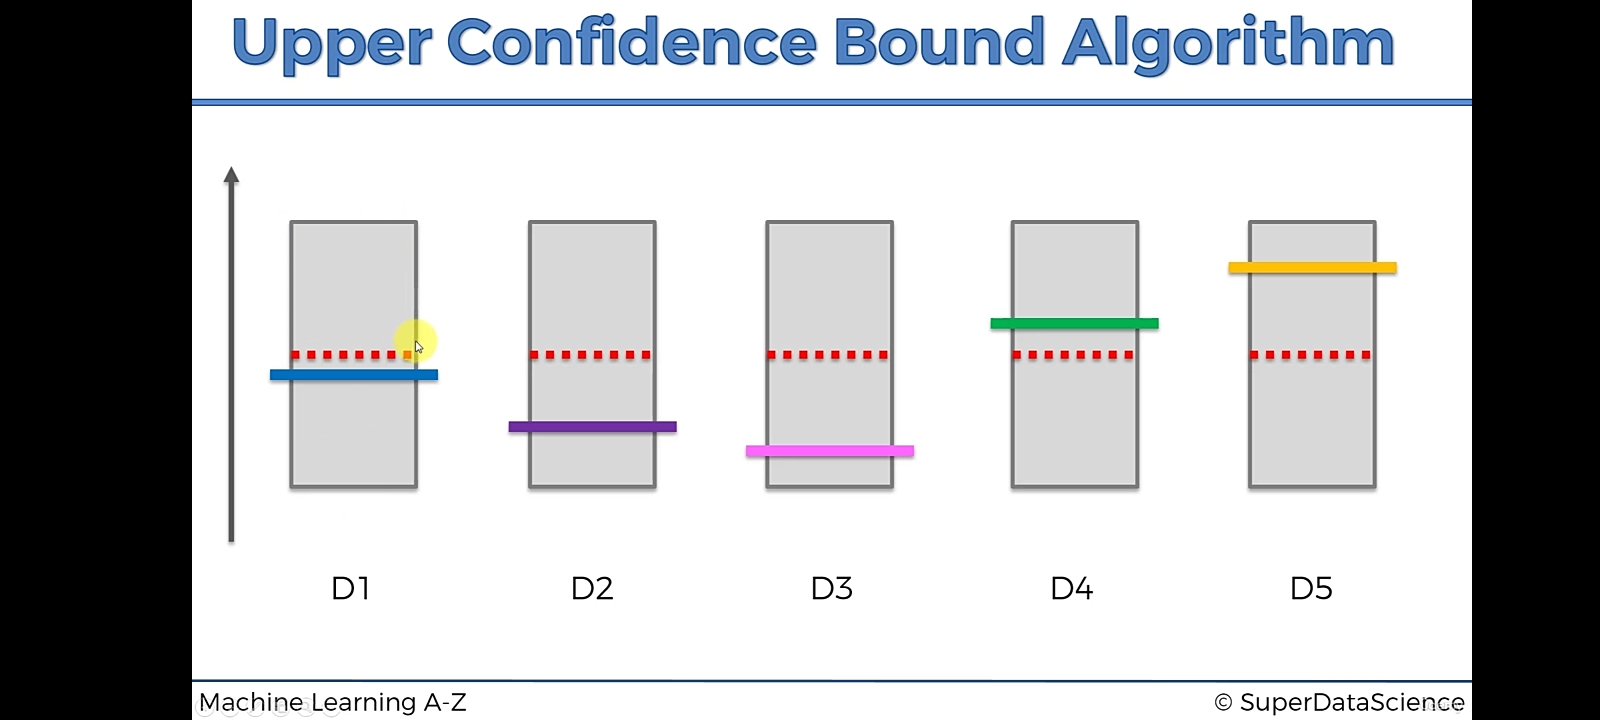

`Step-3:` Now, we have to pick the machine with highest `confidence bound`. Right now all the machines have same level of confidence bound, so pick any.  
`Note`: we only have to consider the `red` lines.

`Step-4:` So, we displayed this `ads` and user didn't click. So, the `red` value goes down for that `ads` and also the confidence bound will shrink.

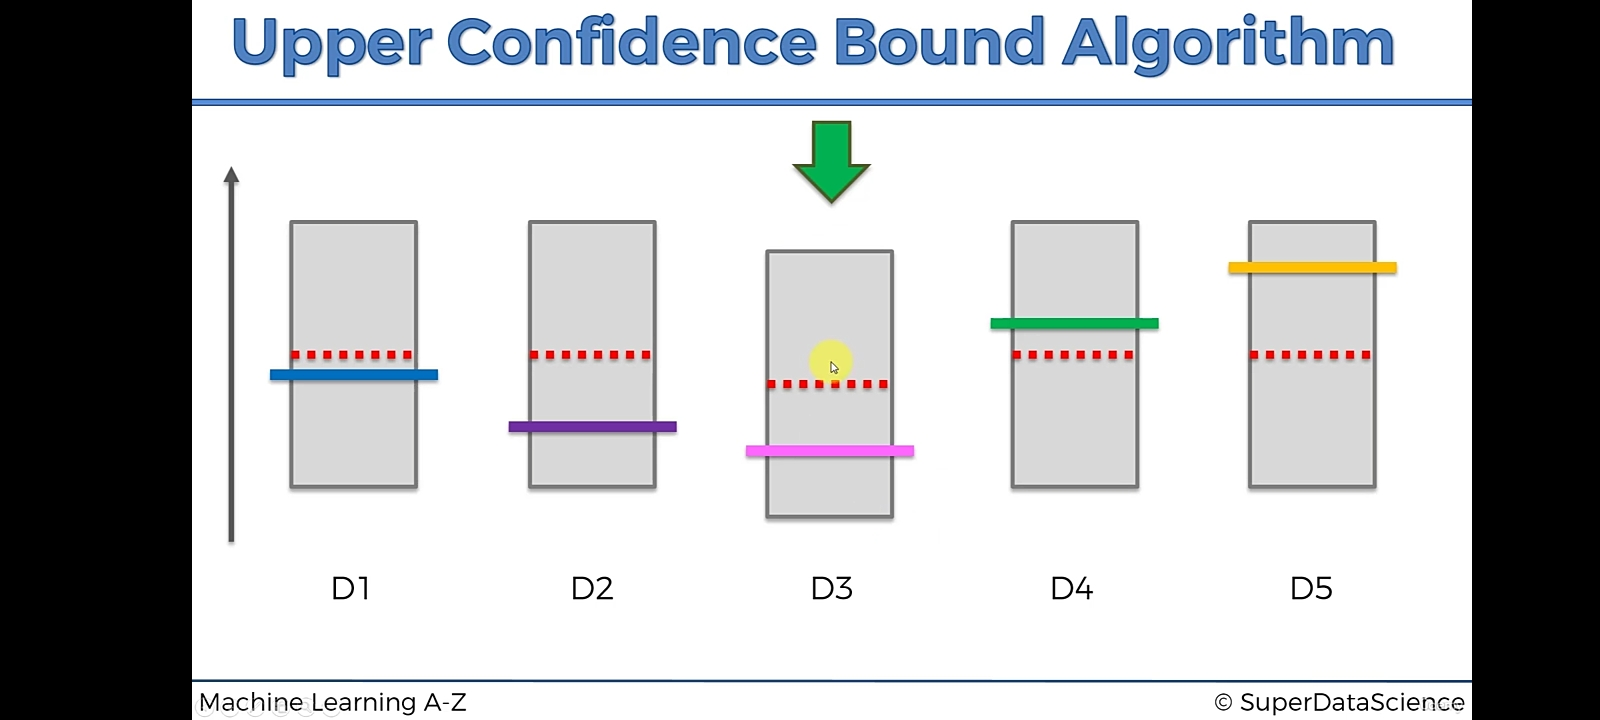

`Note:` As the number of observation increases, the confidence bound will shrink.

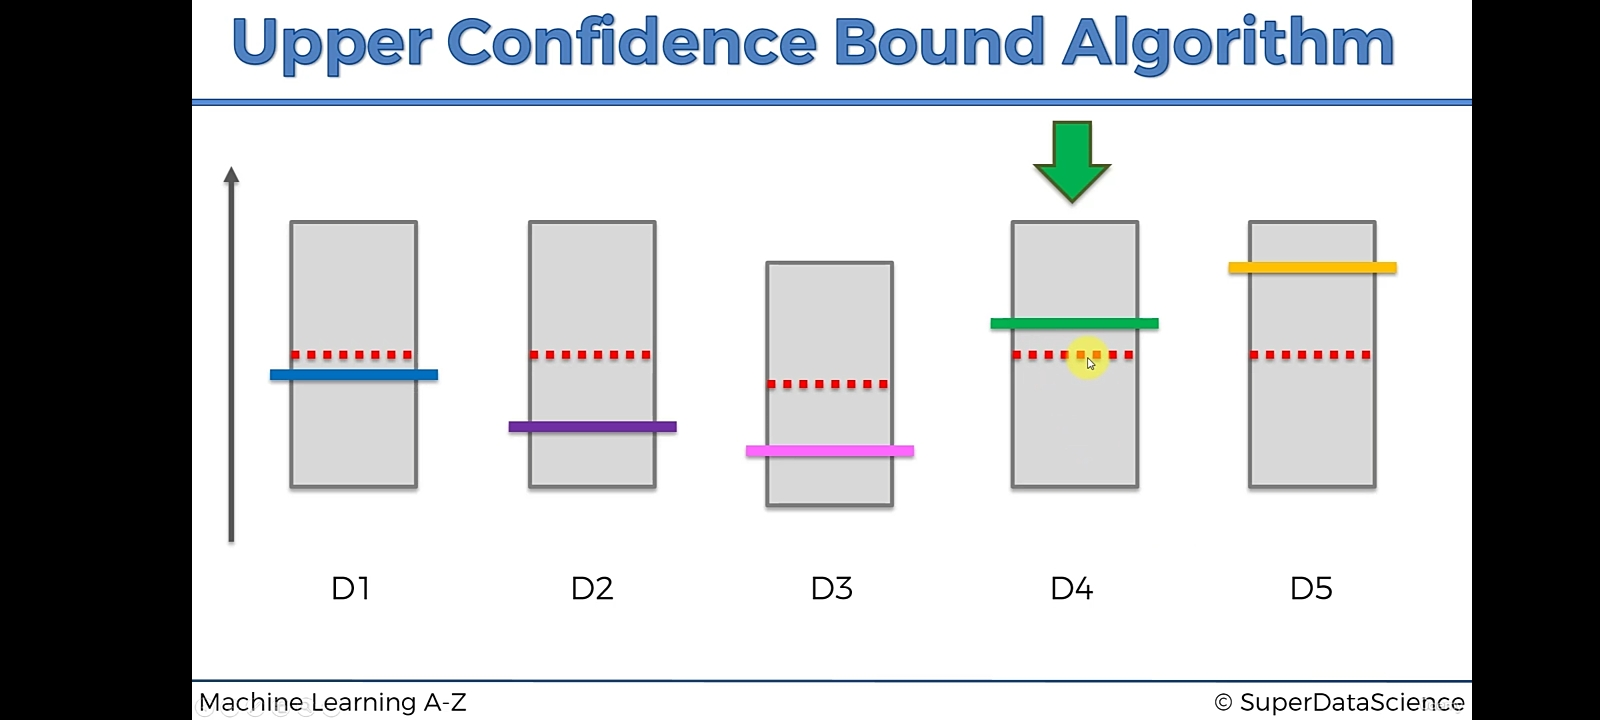


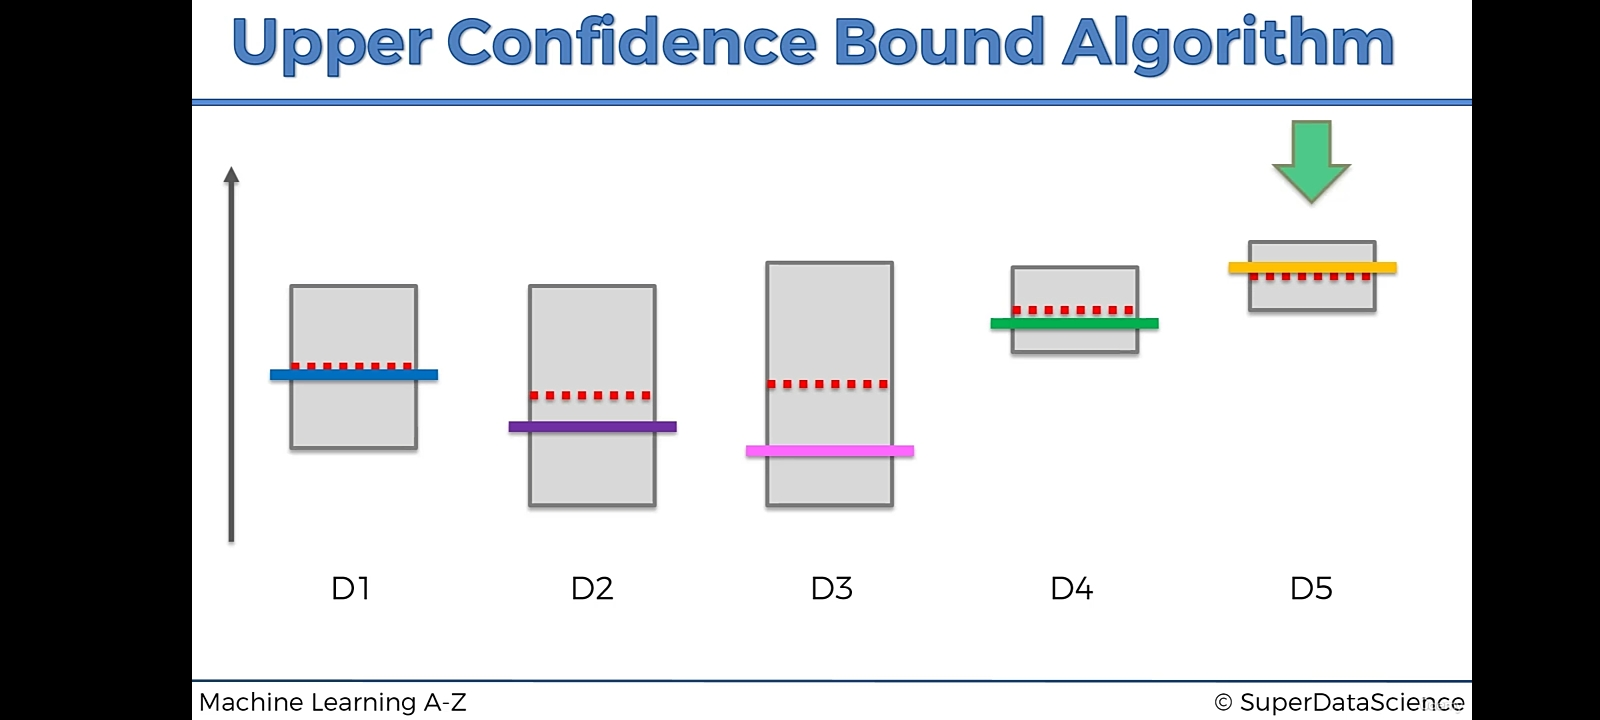




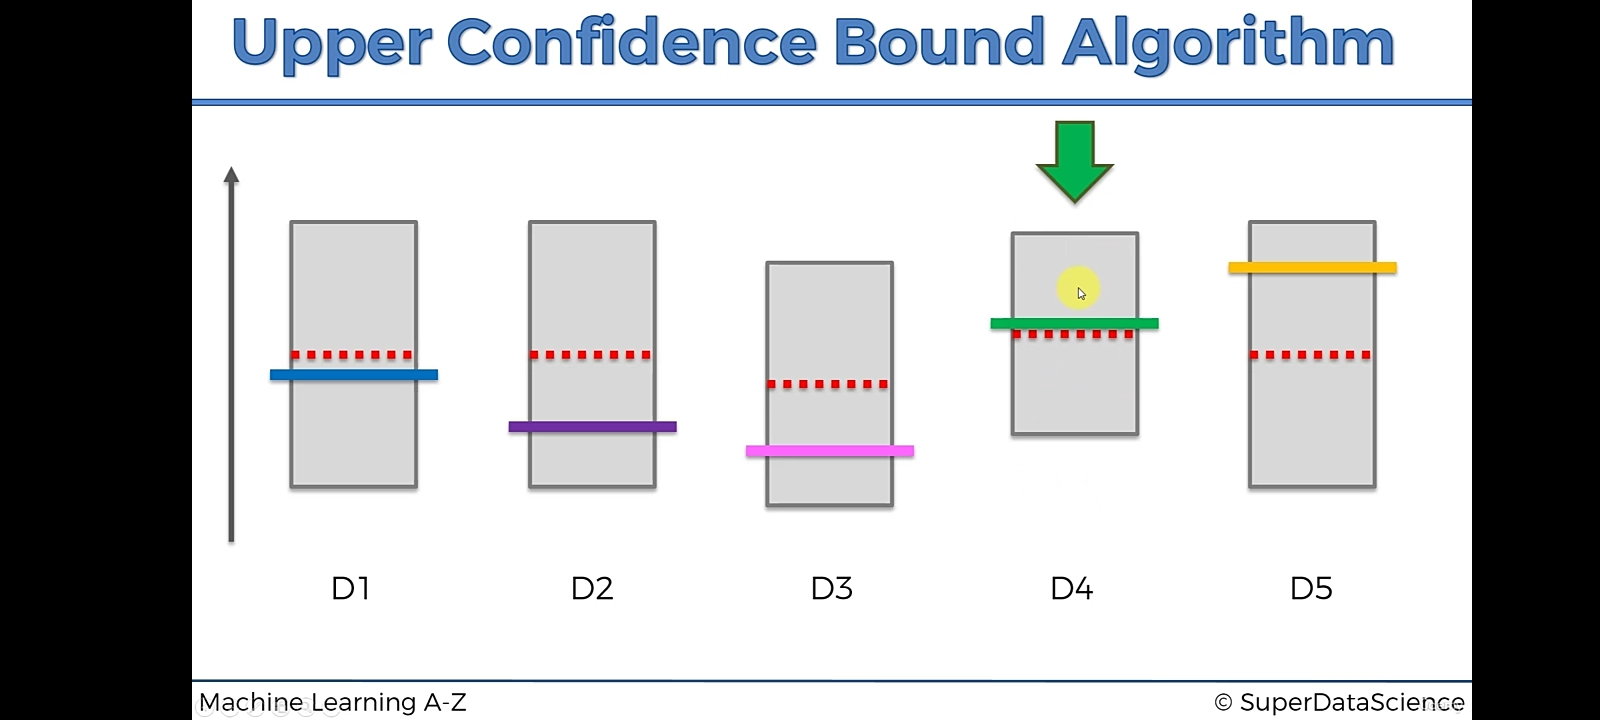

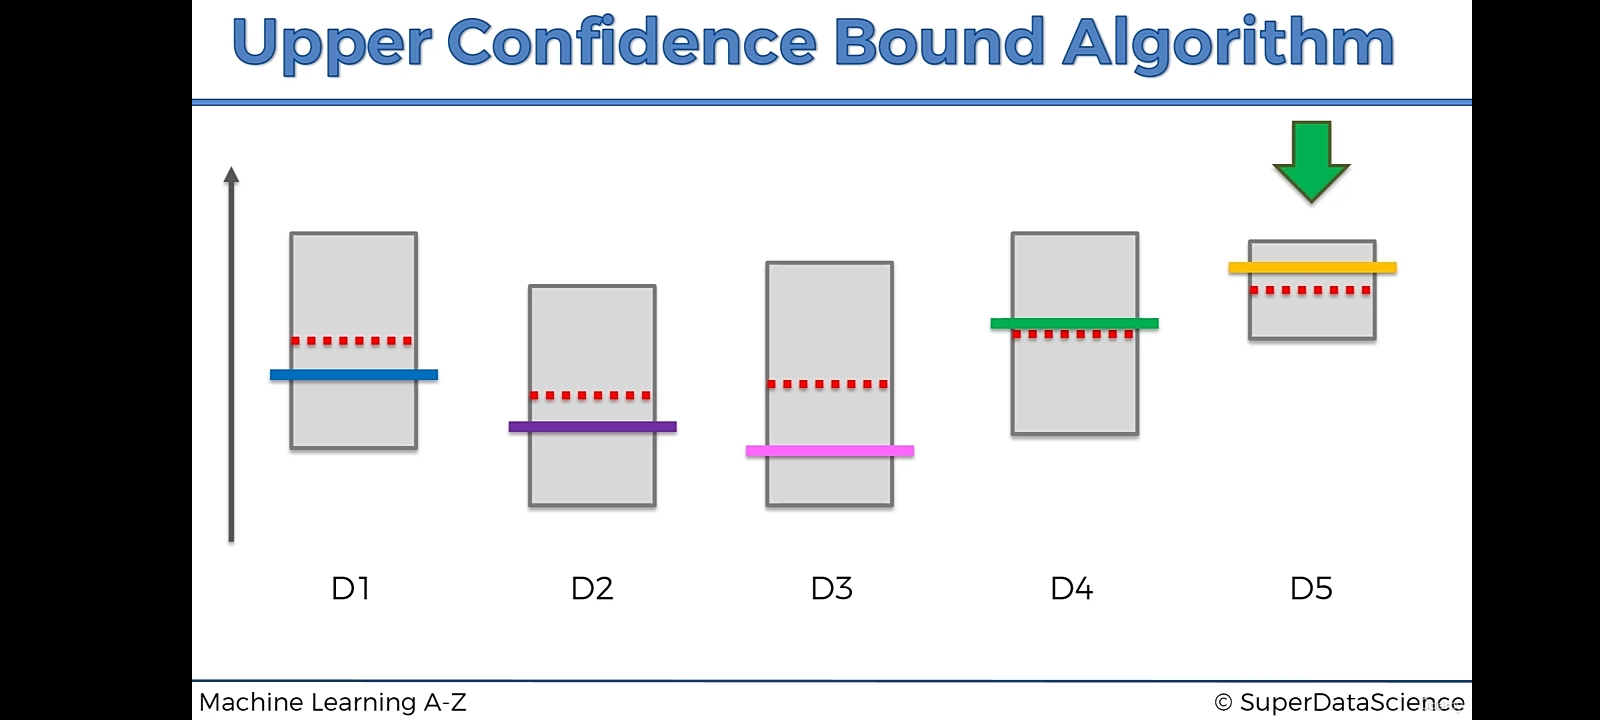

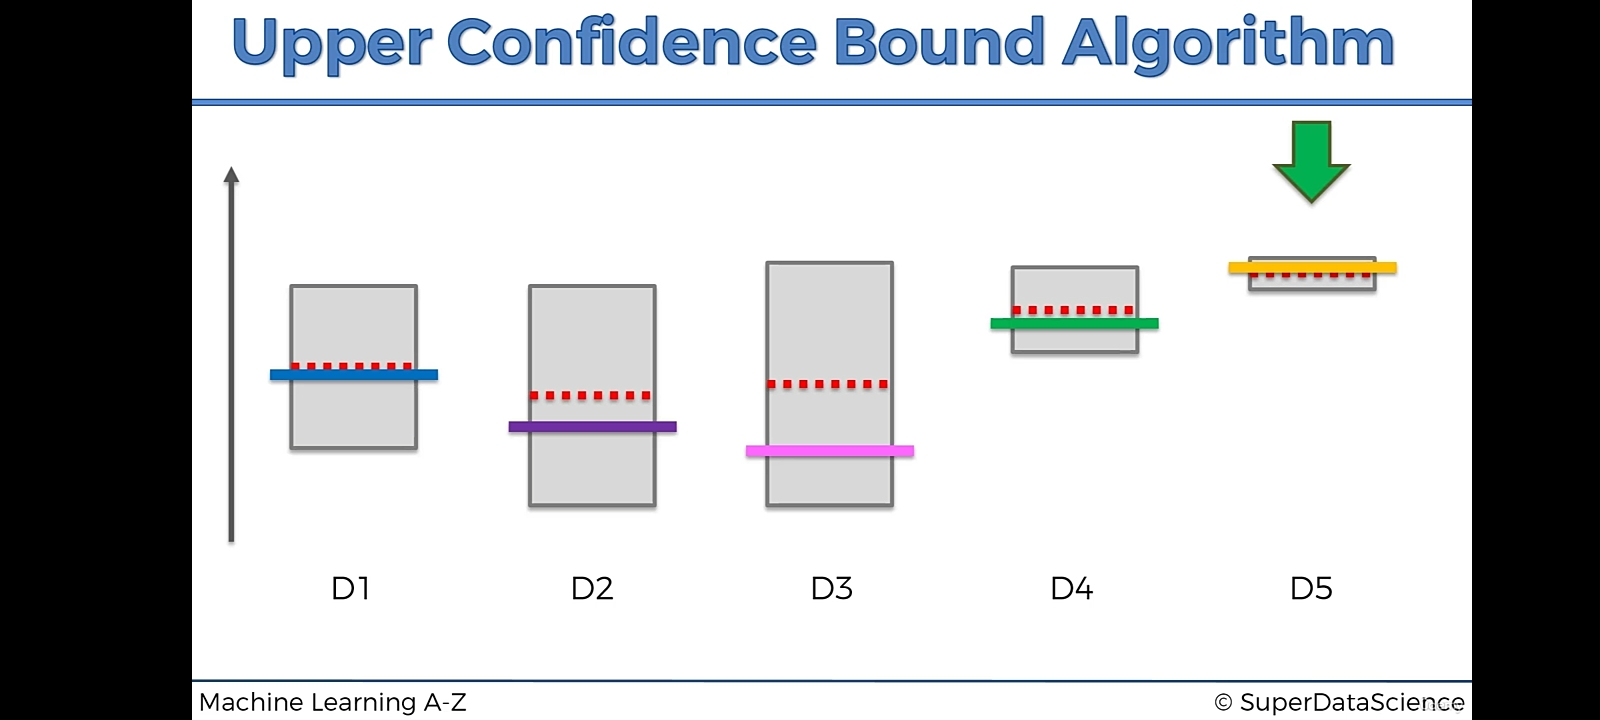

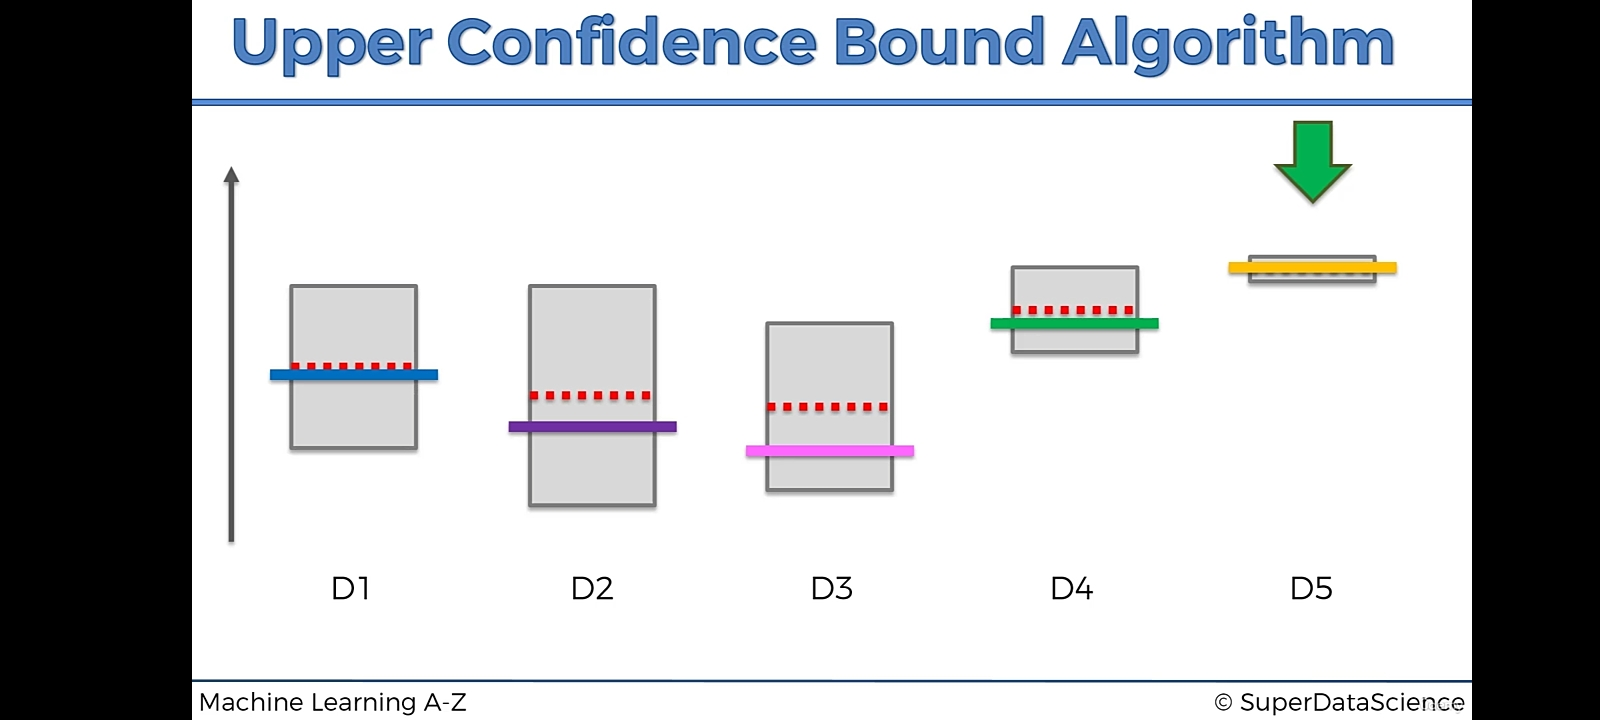

At the end we will found out that `D5` is the best one.

## Dataset

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


The dataset shows the simulation about the clicks by the users.   
the `first user` will only `click` if we show him `Ad 1`, `Ad 5` and `Ad 9`.  
And So on....

## Implementation

We will find the best `ads` that will make the user to click.

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [ ]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing UCB

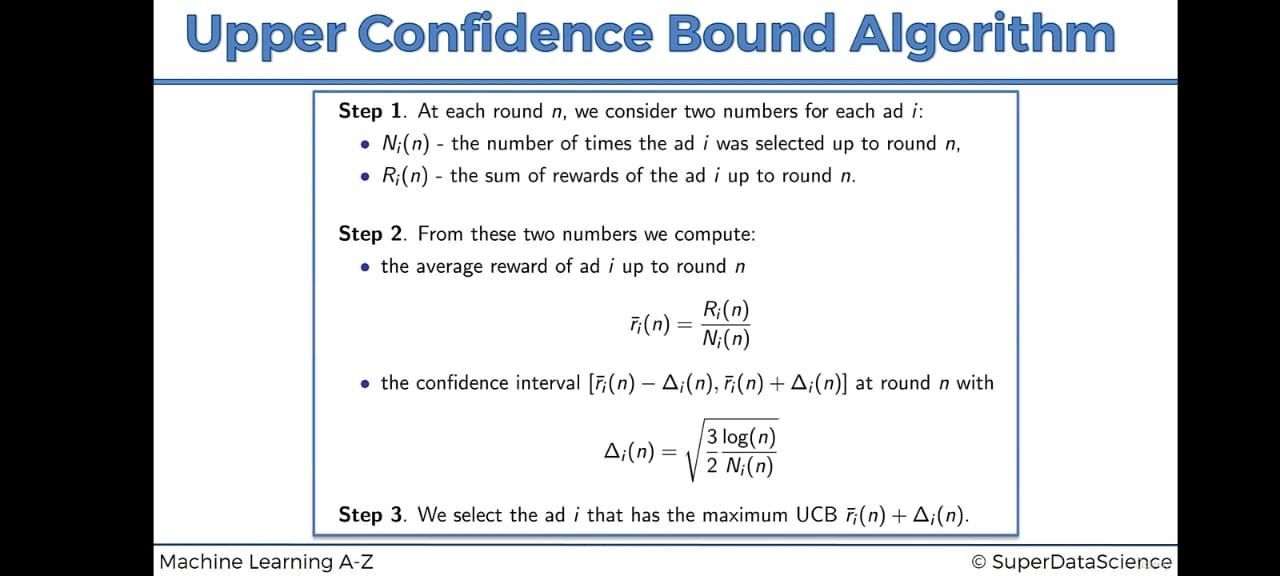

#### Step 1

In [ ]:
N = 1000 # number of users
d = 10 # number of ads
ads_selected = [] # this will keep track of ads selected in each round.
numbers_of_selection = [0]*d # number of times each ad was selected. For example, if ad 1 was selected then the first element of the list will get incremented by 1.
sums_of_rewards =[0]*d # R(n)----
total_reward = 0

#### Step-2

In [ ]:
import math
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if(numbers_of_selection[i]>0):
      average_reward = sums_of_rewards[i]/numbers_of_selection[i]
      delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selection[i]) # log(n+1) instead of log(n), because 'n' is starting from the zero.
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] = numbers_of_selection[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

### Visualizing the results

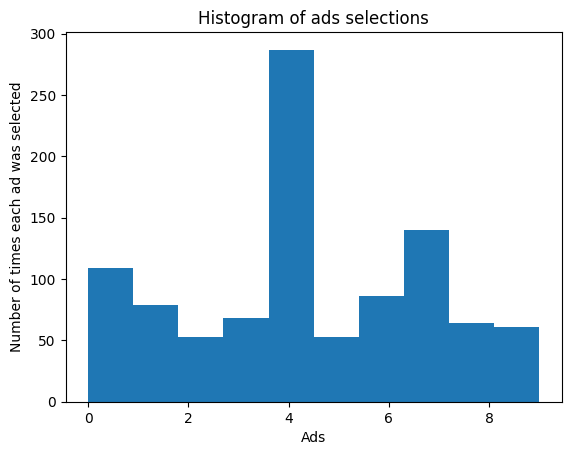

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

- `500` ads are not enough for identifying best rewards.
- minimum `1000` ads are required.

## Re-Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [ ]:
number_of_selections = [0]*10
sum_of_rewards = [0]*10
ads_selected = [] # for visualizing the reult.

In [ ]:
for n in range(0, 10000):
  current_ad_selected = 0 # this number varies from 0 to 10.
  max_upper_bound = 0

  for i in range(0, 10):
    if(number_of_selections[i]>0):
      average_reward = sum_of_rewards[i]/number_of_selections[i]
      confidence_interval = math.sqrt(3/2*(math.log(n+1)/number_of_selections[i]))
      upper_bound = average_reward + confidence_interval
    else:
      upper_bound = 1e400 # forced exploration.

    if upper_bound>max_upper_bound:
      max_upper_bound = upper_bound
      current_ad_selected = i

  ads_selected.append(current_ad_selected)
  number_of_selections[current_ad_selected] = number_of_selections[current_ad_selected] + 1
  reward = dataset.values[n, current_ad_selected]
  sum_of_rewards[current_ad_selected] = sum_of_rewards[current_ad_selected] + reward


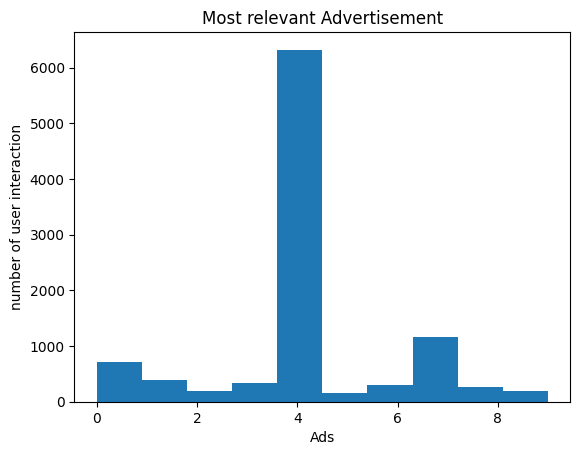

In [ ]:
plt.hist(ads_selected)
plt.title('Most relevant Advertisement')
plt.xlabel('Ads')
plt.ylabel('number of user interaction')
plt.show()

`Ad-4` is the most relevant ad.
